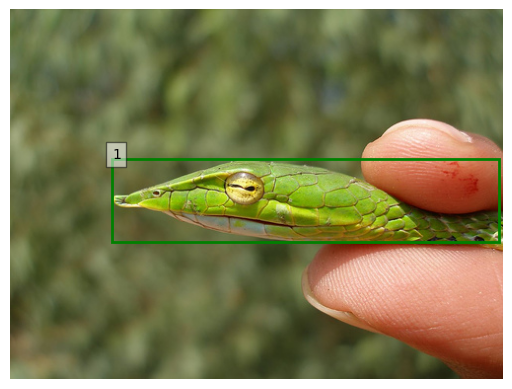

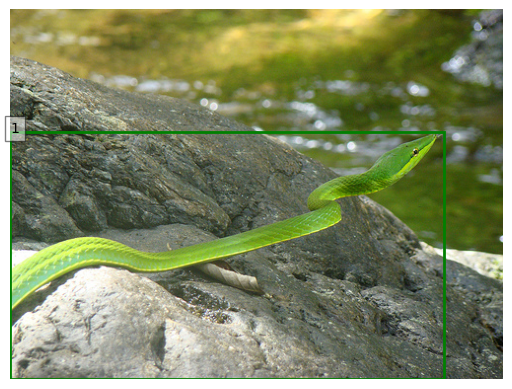

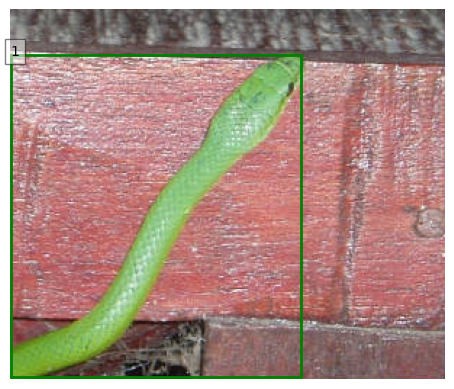

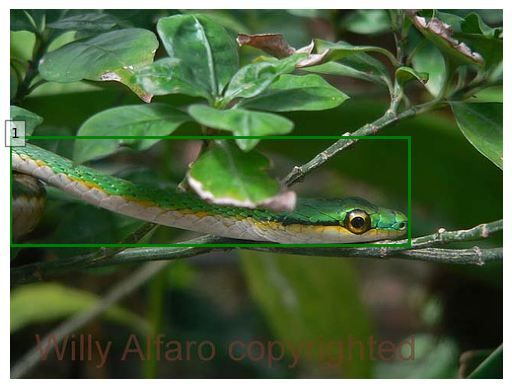

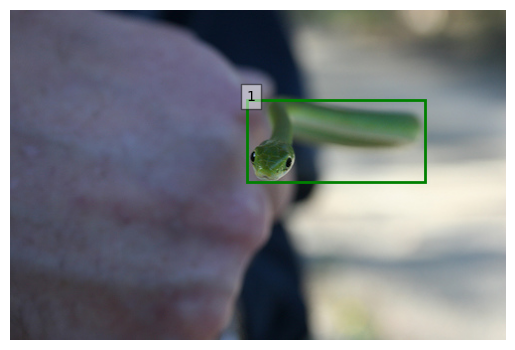

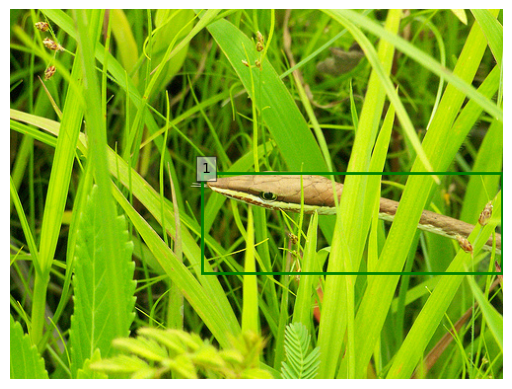

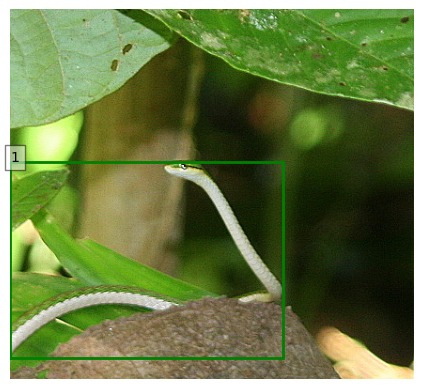

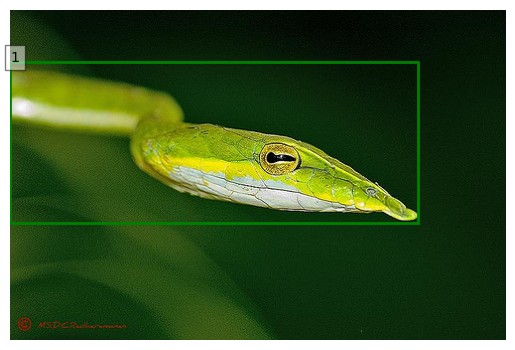

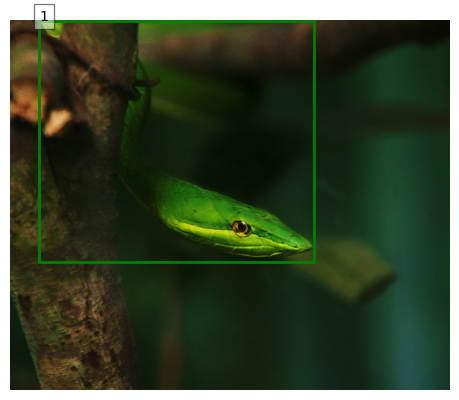

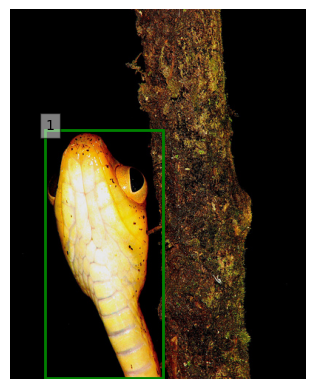

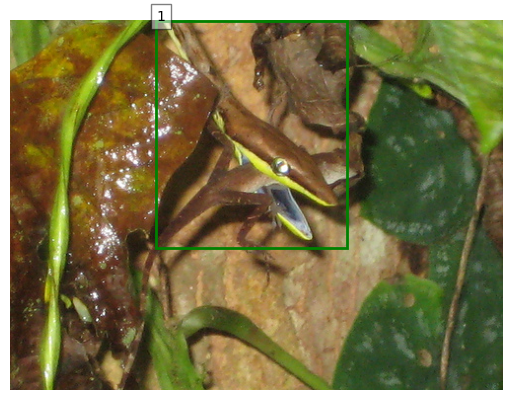

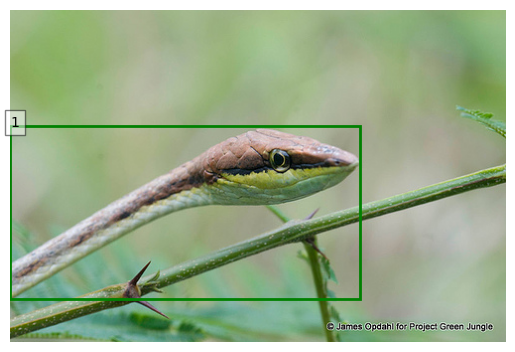

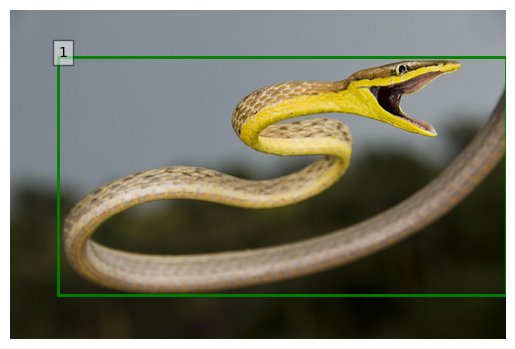

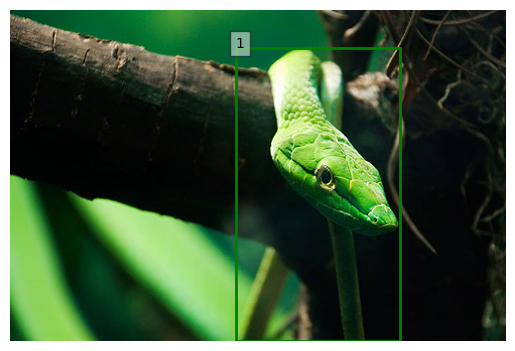

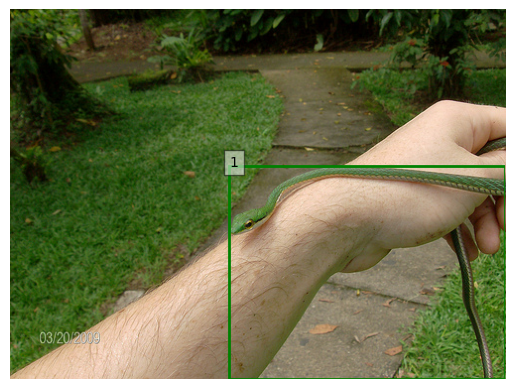

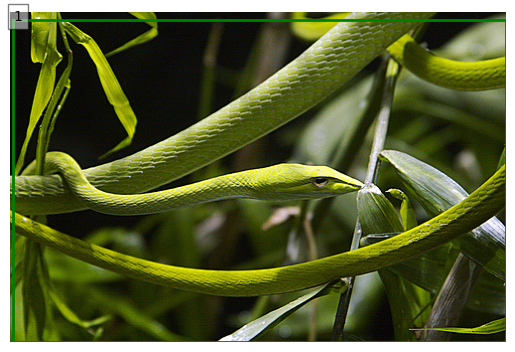

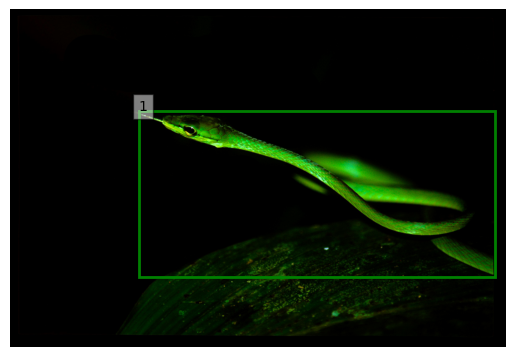

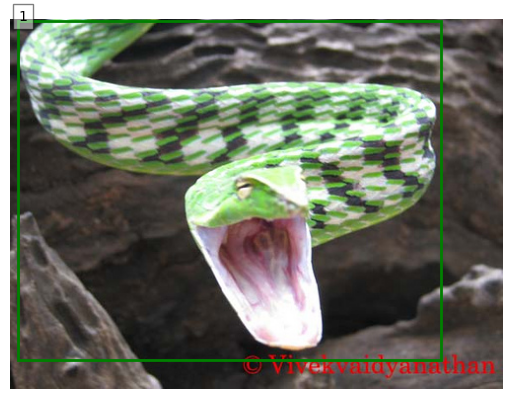

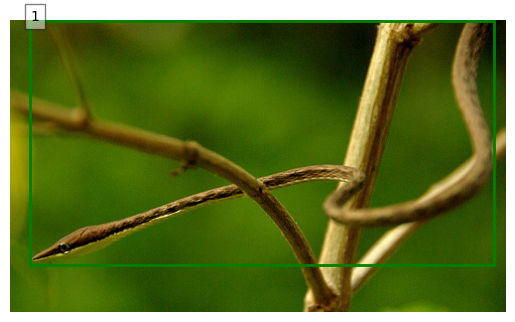

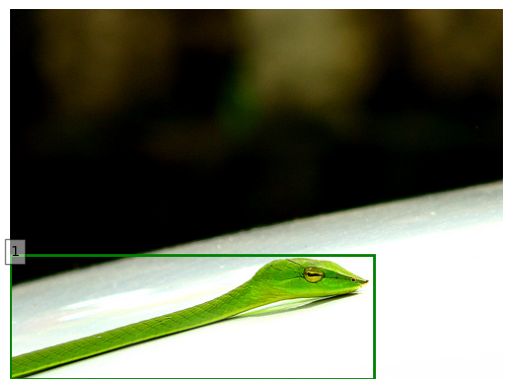

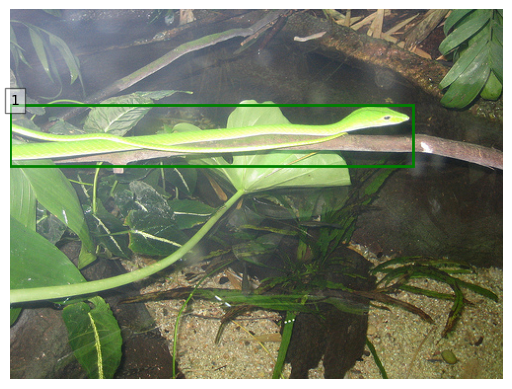

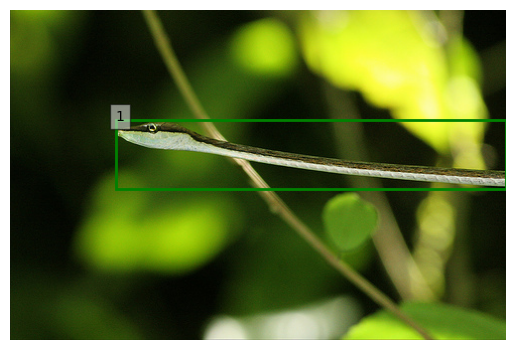

PermissionError: [Errno 13] Permission denied: 'D:\\Data_Exploration\\Images\\n07772935'

In [9]:
import os
import random
import shutil
from PIL import Image
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Step 1: Organize data
# Define folders containing images and their corresponding annotation files
image_folder = "D:\\Data_Exploration\\Images\\n01739381"
annot_folder = "D:\\Data_Exploration\\Annotations\\n01739381"

# Create directories to store organized data
os.makedirs("D:\\Data_Exploration\\Images", exist_ok=True)
os.makedirs("D:\\Data_Exploration\\Annotations", exist_ok=True)

# Copy image files and their annotation files to the organized data directories
images = os.listdir(image_folder)
for image in images:
    xml = os.path.splitext(image)[0] + ".xml"
    if xml in os.listdir(annot_folder):
        shutil.copy(os.path.join(image_folder, image), os.path.join("D:\\Data_Exploration\\Images", image))
        shutil.copy(os.path.join(annot_folder, xml), os.path.join("D:\\Data_Exploration\\Annotations", xml))

# Step 2: Select random images for analysis
images = os.listdir("D:\\Data_Exploration\\Images")
random_images = random.sample(images, 25)

# Define functions to calculate Intersection over Union (IoU)
def calculate_intersection_area(box1, box2):
    # Calculate the area of overlap between two bounding boxes
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    intersection_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    return intersection_area

def calculate_union_area(box1, box2):
    # Calculate the total area covered by two bounding boxes
    area_box1 = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    area_box2 = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    union_area = area_box1 + area_box2 - calculate_intersection_area(box1, box2)
    return union_area

def calculate_overlap_percentage(box1, box2, name1, name2):
    # Calculate the percentage overlap between two bounding boxes
    intersection_area = calculate_intersection_area(box1, box2)
    union_area = calculate_union_area(box1, box2)
    overlap_percentage = intersection_area / union_area
    print(f"Overlap between {name1} and {name2}: {overlap_percentage:.2%}")

# Step 3: Analyze images and annotations
for image in random_images:
    # Load image
    image_path = os.path.join("D:\\Data_Exploration\\Images", image)
    img = Image.open(image_path)
    
    # Load annotation file
    xml_file = os.path.splitext(image)[0] + ".xml"
    xml_path = os.path.join("D:\\Data_Exploration\\Annotations", xml_file)
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    # Create plot
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Extract bounding boxes from annotation file and plot them on the image
    box_count = 0
    boxes = []
    box_names = []
    for obj in root.findall('object'):
        box_count += 1
        xmin = int(obj.find('bndbox').find('xmin').text)
        ymin = int(obj.find('bndbox').find('ymin').text)
        xmax = int(obj.find('bndbox').find('xmax').text)
        ymax = int(obj.find('bndbox').find('ymax').text)
        
        # Draw bounding box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='g', facecolor='none', fill=False)
        ax.add_patch(rect)
        ax.text(xmin, ymin, str(box_count), bbox=dict(facecolor='white', alpha=0.5))
        
        # Store bounding box coordinates and name
        boxes.append([xmin, ymin, xmax, ymax])
        box_names.append(str(box_count))

    # If there are multiple bounding boxes, calculate overlap between each pair
    if len(boxes) > 1:
        for i in range(len(boxes)):
            for j in range(i + 1, len(boxes)):
                calculate_overlap_percentage(boxes[i], boxes[j], box_names[i], box_names[j])

    # Show image with bounding boxes
    ax.axis('off')
    plt.show()
